1)collect thh stock data
2)preprocess the data and train and test the data
3)create a stacked lstm model
4)predict the test data and plot the output
5)predict the duture 30 days andplot the output

In [1]:
key="bc587b4840f8c82114c68f62e73f8809c9c9e532"

In [4]:
import pandas_datareader as pdr

In [5]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

C:\Users\HP\AppData\Local\Temp\ipykernel_6308\2203299146.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('AAPL',api_key=key)


In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [9]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2019-01-30 00:00:00+00:00  165.25  166.15  160.23  163.25  61109780   
       2019-01-31 00:00:00+00:00  166.44  169.00  164.56  166.11  40739649   
       2019-02-01 00:00:00+00:00  166.52  168.98  165.93  166.96  32668138   
       2019-02-04 00:00:00+00:00  171.25  171.66  167.28  167.41  31495582   
       2019-02-05 00:00:00+00:00  174.18  175.08  172.35  172.86  36101628   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2019-01-30 00:00:00+00:00  39.650942  39.866893  38.446417  39.171051   
       2019-01-31 00:00:00+00:00  39.936477  40.550736  39.485380  39.857295   
       2019-02-01 00:00:00+00:00  39.955672  40.545937  39.814105  40.061248   
       2019-02-04 00:00:00+00:00  41.090613  41.188990  40.138031  40.169223   
       2019-02-05 00:00:00+00:00  41.793652  42.009603  41.354553  41.476925   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2019-01-30 00:00:00+00:00  244439120      0.0          1.0  
       2019-01-31 00:00:00+00:00  162958596      0.0          1.0  
       2019-02-01 00:00:00+00:00  130672552      0.0          1.0  
       2019-02-04 00:00:00+00:00  125982328      0.0          1.0  
       2019-02-05 00:00:00+00:00  144406512      0.0          1.0

In [10]:
#picking the close index
df1=df.reset_index()['close']

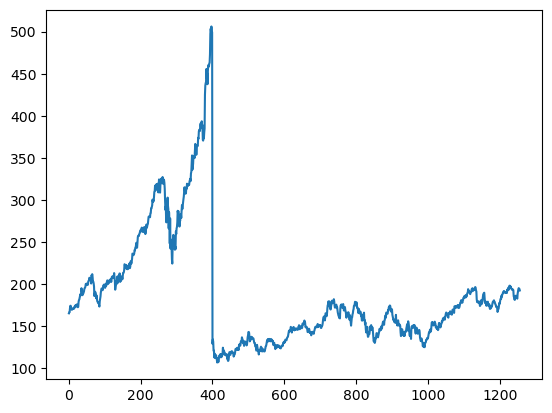

In [11]:
import matplotlib.pyplot as plt 
plt.plot(df1)

In [12]:
#lstm is scale sensitive so it will be scaled between 0-1 using min max scaler
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[0.14629931],
       [0.1492799 ],
       [0.14948028],
       ...,
       [0.21956168],
       [0.21873513],
       [0.21435191]])

preprocess the data and convert it into train and test split
0.65 ratio will be divided in train and that too in continuation


In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
len(train_data)

817

defining timestamps to specify the number of days considerations to predict the output 
x_train will be the previous days and x_test will be the output

In [19]:
import numpy
#convert an array of values into a dataset matrix

def  create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]   ### first three records will go in input
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)    

In [20]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [23]:
print(X_train.shape) ,print(y_train.shape),print(X_test.shape),print(y_test.shape)  

(716, 100)
(716,)
(339, 100)
(339,)


(None, None, None, None)

In [27]:
X_train[0].shape

(100, 1)

In [24]:
#reshaping and resizing it because lstm takes 3 inputs
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

create a stacked lstm model one after the other layer model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))#X_train.shape[1],1)) 50 hidden layers
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10

12/12 [==============================] - 9s 293ms/step - loss: 0.0460 - val_loss: 0.0019
Epoch 2/10
12/12 [==============================] - 2s 136ms/step - loss: 0.0123 - val_loss: 3.6638e-04
Epoch 3/10
12/12 [==============================] - 2s 145ms/step - loss: 0.0103 - val_loss: 3.4584e-04
Epoch 4/10
12/12 [==============================] - 2s 136ms/step - loss: 0.0089 - val_loss: 2.8763e-04
Epoch 5/10
12/12 [==============================] - 2s 147ms/step - loss: 0.0078 - val_loss: 4.4134e-04
Epoch 6/10
12/12 [==============================] - 2s 136ms/step - loss: 0.0073 - val_loss: 5.7665e-04
Epoch 7/10
12/12 [==============================] - 2s 128ms/step - loss: 0.0060 - val_loss: 4.6221e-04
Epoch 8/10
12/12 [==============================] - 1s 124ms/step - loss: 0.0060 - val_loss: 2.7174e-04
Epoch 9/10
12/12 [==============================] - 2s 128ms/step - loss: 0.0047 - val_loss: 3.8228e-04
Epoch 10/10
12/12 [==============================] - 2s 131ms/step 

In [ ]:
#predict the test data and print the output for that we have to predict the values in test and train data both

In [30]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 37ms/step


In [31]:
#scale back to previous form 
#train predict is output for train dataset
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
#calculate the rmse performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

223.33144976160472

In [33]:
math.sqrt(mean_squared_error(y_test,test_predict))

175.4991758417661

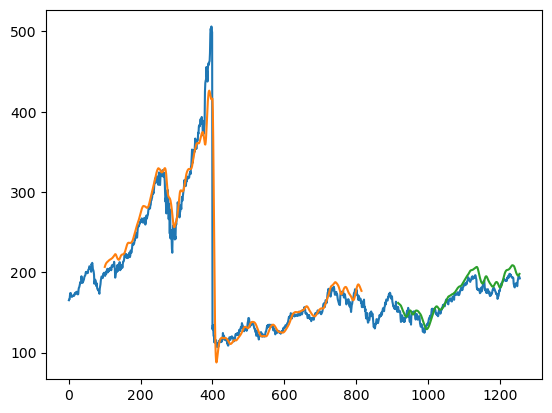

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

predict the future 30 days and plot the output 

In [35]:
len(test_data)

440

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input   #previous 100 days data

[0.19053224796493418,
 0.1771321227301189,
 0.17868503443957418,
 0.18164057608015027,
 0.17397620538509706,
 0.16874139010644956,
 0.17257357545397617,
 0.17074514715090788,
 0.17815904821540385,
 0.18091421415153408,
 0.17194740137758296,
 0.16804007514088914,
 0.17019411396368184,
 0.173425172197871,
 0.16310582341891044,
 0.15927363807138384,
 0.15992485911083276,
 0.16122730118973072,
 0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,
 0.18071383844708827,
 0.17921102066374445,
 0.18274264245460237,
 0.1850219160926737,
 0.18036318096430803,
 0.18003757044458357,
 0.17610519724483403,
 0.17282404508453347,
 0.17187226048841575,
 0.1654101440200375,
 0.1657107075767063,
 0.1668127739511584,
 0.16095178459611764,
 0.15040701314965554,
 0.1537382592360676,
 0.15892298058860355,
 0.16012523481527863,
 0.16814026299311202,
 0.17715716969317463,
 0.17485284909204757,
 0.1813149655604257,
 0.18780212899185966,
 0.19048215403882274

In [41]:
# demonstrate prediction for next 10 days

from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):
    
    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])  #shifting 1 position right
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.23491018]
100
1 day input [0.17713212 0.17868503 0.18164058 0.17397621 0.16874139 0.17257358
 0.17074515 0.17815905 0.18091421 0.1719474  0.16804008 0.17019411
 0.17342517 0.16310582 0.15927364 0.15992486 0.1612273  0.16758923
 0.16420789 0.16736381 0.17049468 0.17695679 0.18071384 0.17921102
 0.18274264 0.18502192 0.18036318 0.18003757 0.1761052  0.17282405
 0.17187226 0.16541014 0.16571071 0.16681277 0.16095178 0.15040701
 0.15373826 0.15892298 0.16012523 0.16814026 0.17715717 0.17485285
 0.18131497 0.18780213 0.19048215 0.1892799  0.19927364 0.19526612
 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235 0.20989355
 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259 0.20816531
 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856  0.22259236
 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511  0.22304321
 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987 0.21618034
 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755 0.18619912
 0.19716969 0.19611772 0.19874765

In [42]:
day_new=np.arange(1,101)  #considering previous 100 days
day_pred=np.arange(101,131)  #because 30 days prediction we want 

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1257

In [45]:
df3=df1.tolist()
df3.extend(lst_output)

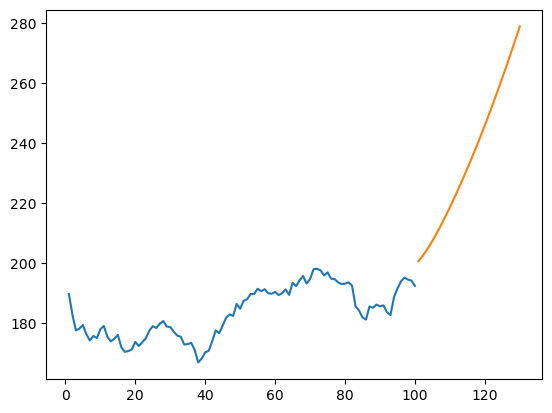

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

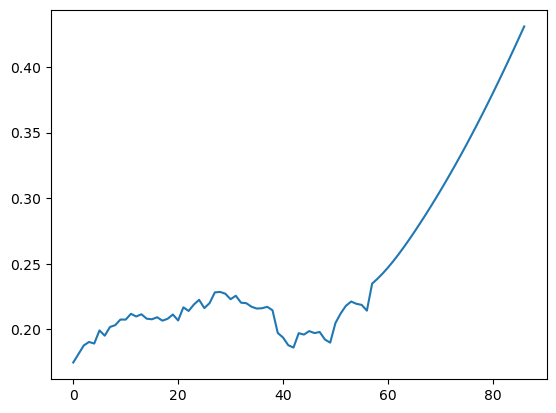

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

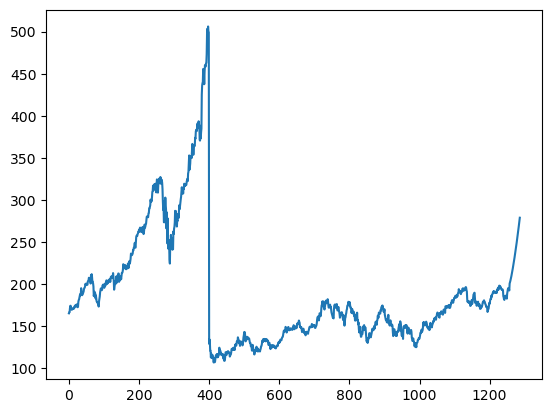

In [49]:
plt.plot(df3)